# Assignment 2 - SML - Audit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from numpy.linalg import eig

## Q1. a. 
##### Generating 200 Multivariate Bernoulli Distributed Samples

In [2]:
c1x1b = bernoulli.rvs(0.5, size=100)
c1x2b = bernoulli.rvs(0.8, size=100)
c2x1b = bernoulli.rvs(0.9, size=100)
c2x2b = bernoulli.rvs(0.2, size=100)

c1x1 = []
c1x2 = []
c2x1 = []
c2x2 = []

# Converting the distribution into iteratable lists
for x1 in c1x1b:
    c1x1.append(x1)
for x2 in c1x2b:
    c1x2.append(x2)
for x1 in c2x1b:
    c2x1.append(x1)
for x2 in c2x2b:
    c2x2.append(x2)

c1x1_train = []
c1x2_train = []
c2x1_train = []
c2x2_train = []

c1x1_test = []
c1x2_test = []
c2x1_test = []
c2x2_test = []

# Splitting the data into train test splits
c1x1_train = c1x1[0:50]
c1x2_train = c1x2[0:50]
c2x1_train = c2x1[0:50]
c2x2_train = c2x2[0:50]

c1x1_test = c1x1[50:100]
c1x2_test = c1x2[50:100]
c2x1_test = c2x1[50:100]
c2x2_test = c2x2[50:100]

## Q1. b. 
#### Creating the MLE function to be used for Class 1 and Class 2

In [3]:
def MLE(X):
    return ((1/len(X)) * np.sum(X))

#### Creating the list of MLEs calcualted after taking n observations at a time where n ranges from 1 to 50 and plotting the observations versus number of samples taken for the MLE for class 1

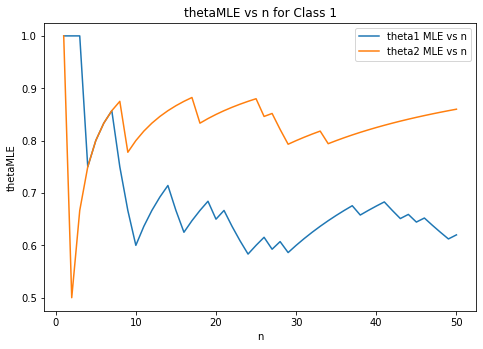

In [4]:
c1theta1MLE = MLE(c1x1_train)
c1theta2MLE = MLE(c1x2_train)
thetac1 = [c1theta1MLE, c1theta2MLE]

c1theta1MLEob = [] # Observations taking n samples at a time, where n = 1, 2, 3, ..., n for theta 1 of class 1
for i in range(50):
    c1theta1MLEob.append(MLE(c1x1_train[0:i+1]))

c1theta2MLEob = [] # Observations taking n samples at a time, where n = 1, 2, 3, ..., n for theta 2 of class 1
for i in range(50):
    c1theta2MLEob.append(MLE(c1x2_train[0:i+1]))

n = [i for i in range(1,51)]

# Plotting the MLE observations vs n samples
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(n, c1theta1MLEob, label='theta1 MLE vs n')
ax.plot(n, c1theta2MLEob, label='theta2 MLE vs n')
ax.legend(loc='upper right')
plt.xlabel('n')
plt.ylabel('thetaMLE')
plt.title('thetaMLE vs n for Class 1')
plt.show()

## Q1. c.
#### Creating the list of MLEs calcualted after taking n observations at a time where n ranges from 1 to 50 and plotting the observations versus number of samples taken for the MLE for class 2

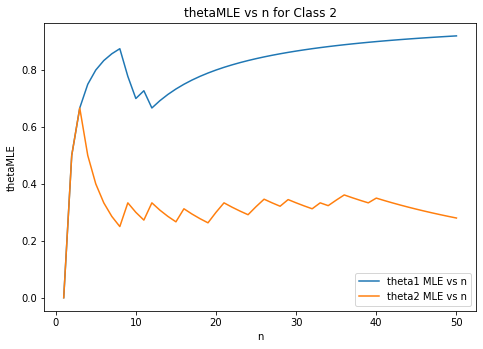

In [5]:
c2theta1MLE = MLE(c2x1_train)
c2theta2MLE = MLE(c2x2_train)
thetac2 = [c2theta1MLE, c2theta2MLE]

c2theta1MLEob = [] # Observations taking n samples at a time, where n = 1, 2, 3, ..., n for theta 1 of class 2
for i in range(50):
    c2theta1MLEob.append(MLE(c2x1_train[0:i+1]))

c2theta2MLEob = [] # Observations taking n samples at a time, where n = 1, 2, 3, ..., n for theta 2 of class 2
for i in range(50):
    c2theta2MLEob.append(MLE(c2x2_train[0:i+1]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(n, c2theta1MLEob, label='theta1 MLE vs n')
ax.plot(n, c2theta2MLEob, label='theta2 MLE vs n')
ax.legend(loc='lower right')
plt.xlabel('n')
plt.ylabel('thetaMLE')
plt.title('thetaMLE vs n for Class 2')
plt.show()

## Q1. d.
#### Plotting the samples using a scatter plot

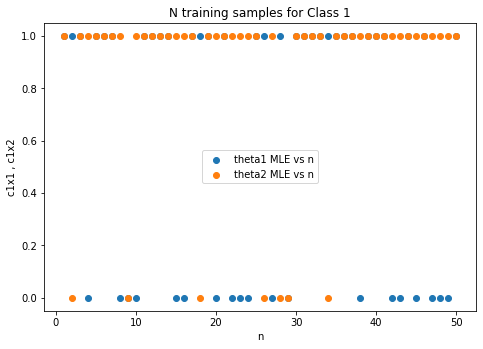

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(n, c1x1_train, label='theta1 MLE vs n')
ax.scatter(n, c1x2_train, label='theta2 MLE vs n')
ax.legend(loc='center')
plt.xlabel('n')
plt.ylabel('c1x1 , c1x2')
plt.title('N training samples for Class 1')
plt.show()

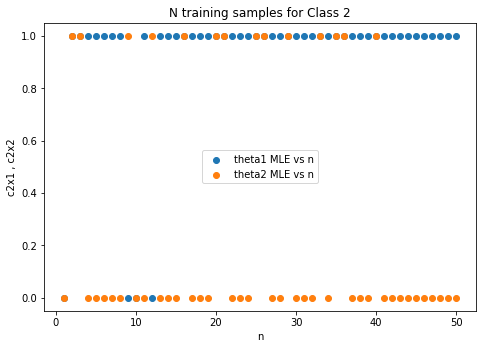

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(n, c2x1_train, label='theta1 MLE vs n')
ax.scatter(n, c2x2_train, label='theta2 MLE vs n')
ax.legend(loc='center')
plt.xlabel('n')
plt.ylabel('c2x1 , c2x2')
plt.title('N training samples for Class 2')
plt.show()

## Q1. e.
#### Classification of the test samples

In [8]:
# Function to find the discriminant of the Multivariate Bernoulli Distribution
def discriminant(x1, x2, thetac1, thetac2):
    nr = (x1 * np.log(thetac1[0])) + ((1 - x1) * np.log((1 - thetac1[0]))) + (x2 * np.log((thetac1[1]))) + ((1 - x2) * np.log((1 - thetac1[1])))
    dr = (x1 * np.log(thetac2[0])) + ((1 - x1) * np.log((1 - thetac2[0]))) + (x2 * np.log((thetac2[1]))) + ((1 - x2) * np.log((1 - thetac2[1])))
    g = nr/dr
    if g > 0:
        return 1
    else:
        return 2

In [9]:
# Finding out the results for the samples

cc = 0 # Count to keep track of correct classification
for x1, x2 in zip(c1x1_test, c1x2_test):
    g = discriminant(x1, x2, thetac1, thetac2)
    if g == 1:
        cc += 1
for x1, x2 in zip(c2x1_test, c2x2_test):
    g = discriminant(x1, x2, thetac1, thetac2)
    if g == 2:
        cc += 1

n = len(c1x1_test) + len(c2x1_test)
print("The number of correct classifications predicted out of {} test samples is {}".format(n ,cc))

The number of correct classifications predicted out of 100 test samples is 50


## Q3.c.
#### Computing part a and c

In [10]:
X = np.array([[1, 0],[0, 1]])
mu = np.array([0.5, 0.5]) # Mean of X
Xc = np.array(X-mu) # Centralized Matrix of X
print("Centralized Xc = {}".format(Xc))
SXc = np.cov(Xc)
print("Covariance SXc = {}".format(SXc))
v, U = eig(SXc)
print("Eigan values = {}".format(v))
print("Eigan vectors = {}".format(U))
Y = np.dot(np.matrix.transpose(U),SXc) # U'Xc
print("Y = U'Xc = {}".format(Y))
UYdc = np.array(np.dot(U,Y) + mu) # Decentralized matrix of UY
print("UY + mean(X) = {}".format(UYdc))
d = np.subtract(UYdc, X) # Difference
ds = np.square(d) # Squared difference
MSE = ds.mean() # MSE
print("MSE = {}".format(MSE))

Centralized Xc = [[ 0.5 -0.5]
 [-0.5  0.5]]
Covariance SXc = [[ 0.5 -0.5]
 [-0.5  0.5]]
Eigan values = [1.00000000e+00 1.11022302e-16]
Eigan vectors = [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Y = U'Xc = [[ 7.07106781e-01 -7.07106781e-01]
 [-1.11022302e-16  1.11022302e-16]]
UY + mean(X) = [[1.00000000e+00 5.55111512e-17]
 [1.11022302e-16 1.00000000e+00]]
MSE = 6.933347799794049e-33


## Q3. d,e.

In [11]:
X = []
r=42
for i in range(2):
    x = multivariate_normal.rvs(mean = 0.5, cov=0.5, size=2, random_state=r)
    r += 1
    X.append(x)
mu = np.array([0.5, 0.5]) # Mean of X
Xc = np.array(X-mu) # Centralized Matrix of X
print("Centralized Xc = {}".format(Xc))
SXc = np.cov(Xc)
print("Covariance SXc = {}".format(SXc))
v, U = eig(SXc)
print("Eigan values = {}".format(v))
print("Eigan vectors = {}".format(U))
Y = np.dot(np.matrix.transpose(U),SXc) # U'Xc
print("Y = U'Xc = {}".format(Y))
UYdc = np.array(np.dot(U,Y) + mu) # Decentralized matrix of UY
print("UY + mean(X) = {}".format(UYdc))
d = np.subtract(UYdc, X) # Difference
ds = np.square(d) # Squared difference
MSE = ds.mean() # MSE
print("MSE = {}".format(MSE))

Centralized Xc = [[ 0.35122995 -0.09776762]
 [ 0.18200923 -0.64239338]]
Covariance SXc = [[0.10079941 0.18507739]
 [0.18507739 0.33981984]]
Eigan values = [0.         0.44061924]
Eigan vectors = [[-0.87819838 -0.47829657]
 [ 0.47829657 -0.87819838]]
Y = U'Xc = [[ 0.          0.        ]
 [-0.21074667 -0.38695111]]
UY + mean(X) = [[0.60079941 0.68507739]
 [0.68507739 0.83981984]]
MSE = 0.27686724272424906


## Q 3. f.

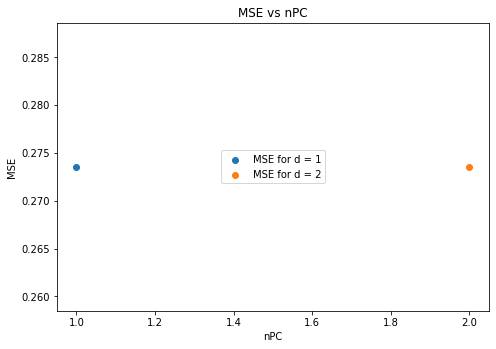

In [12]:
Up1 = U[0] # For 2 principal component
Up2 = U # For 2 principal components
Y1 = np.dot(np.matrix.transpose(Up1),SXc) # Up1'Xc
Y2 = np.dot(np.matrix.transpose(Up2),SXc) # Up2'Xc
UpY1 = np.array(np.dot(Up1,Y1) + mu) # Decentralized matrix of UY
UpY2 = np.array(np.dot(Up2,Y2) + mu) # Decentralized matrix of UY
MSE1 = (np.square(np.subtract(UpY1,X))).mean()
MSE2 = (np.square(np.subtract(UpY1,X))).mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(1, MSE1, label='MSE for d = 1')
ax.scatter(2, MSE2, label='MSE for d = 2')
ax.legend(loc='center')
plt.xlabel('nPC')
plt.ylabel('MSE')
plt.title('MSE vs nPC')
plt.show()